In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(r"/gdrive/MyDrive/data_score.csv")

In [ ]:
df.head()

,ID,C1,C2,C3,C4,C5,score
0,MYNB48764759382421,1,1,5,1,1,80
1,ZIRW92411578156593,1,1,5,1,0,50
2,POQI08016097535139,0,1,2,0,1,79
3,HZEZ87115871484185,1,0,5,1,1,85
4,GZTR94719659342320,1,0,5,0,0,75


# **I-Classification**

In [ ]:
fraudeur = df[df["score"]>=75]
non_fraudeur = df[df["score"]<75]

In [ ]:
print(fraudeur.shape,non_fraudeur.shape)

(2934, 7) (2066, 7)


In [ ]:
df1=df.drop(["ID"], axis = 1)

In [ ]:
df1

,C1,C2,C3,C4,C5,score
0,1,1,5,1,1,80
1,1,1,5,1,0,50
2,0,1,2,0,1,79
3,1,0,5,1,1,85
4,1,0,5,0,0,75
...,...,...,...,...,...,...
4995,1,1,4,1,0,50
4996,1,0,5,1,0,79
4997,1,0,4,1,1,79
4998,1,1,3,0,0,79


In [ ]:
conditionlist1 = [
    (df1["score"]>=75),
    (df1["score"]<75),
     
    ]
choicelist = [1,0]
df1['classe'] = np.select(conditionlist1, choicelist, default='Not Specified')

In [ ]:
print(df1)

      C1  C2  C3  C4  C5  score classe
0      1   1   5   1   1     80      1
1      1   1   5   1   0     50      0
2      0   1   2   0   1     79      1
3      1   0   5   1   1     85      1
4      1   0   5   0   0     75      1
...   ..  ..  ..  ..  ..    ...    ...
4995   1   1   4   1   0     50      0
4996   1   0   5   1   0     79      1
4997   1   0   4   1   1     79      1
4998   1   1   3   0   0     79      1
4999   1   1   2   1   0     19      0

[5000 rows x 7 columns]


# **II-Modelisation**

In [ ]:
DataModel = df1[['C1','C2','C3','C4','C5','classe']]

In [ ]:
#Partition de la dataframe en une variable à expliquer et des variable explicatives
X= DataModel.iloc[:,0:-1]
Y= DataModel.iloc[:,-1]

In [ ]:
X

,C1,C2,C3,C4,C5
0,1,1,5,1,1
1,1,1,5,1,0
2,0,1,2,0,1
3,1,0,5,1,1
4,1,0,5,0,0
...,...,...,...,...,...
4995,1,1,4,1,0
4996,1,0,5,1,0
4997,1,0,4,1,1
4998,1,1,3,0,0


In [ ]:
Y.value_counts()

1    2934
0    2066
Name: classe, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
#Importaion du StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import recall_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y)

# **1-Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict(X_test)
print('Accuracy of DecisionTree on training set: {:.8f}'.format(dt.score(X_train, Y_train)))
print('Accuracy of DecisionTree on test set: {:.8f}'.format(dt.score(X_test, Y_test)))

Accuracy of DecisionTree on training set: 0.97300000
Accuracy of DecisionTree on test set: 0.96600000


In [ ]:
print(classification_report(y_pred_dt, Y_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       385
           1       0.99      0.95      0.97       615

    accuracy                           0.97      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.97      0.97      0.97      1000



# **2-Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
print('Accuracy of LogisticRegression on training set: {:.8f}'.format(lr.score(X_train, Y_train)))
print('Accuracy of LogisticRegression on test set: {:.8f}'.format(lr.score(X_test, Y_test)))

Accuracy of LogisticRegression on training set: 0.95350000
Accuracy of LogisticRegression on test set: 0.93200000


In [ ]:
print(classification_report(y_pred_lr, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       461
           1       0.90      0.98      0.94       539

    accuracy                           0.93      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.93      0.93      1000



# **3-Gaussian NB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
y_pred_GNB = GNB.predict(X_test)
print('Accuracy of GaussianNB on training set: {:.8f}'.format(GNB.score(X_train, Y_train)))
print('Accuracy of GaussianNB  on test set: {:.8f}'.format(GNB.score(X_test, Y_test)))

Accuracy of GaussianNB on training set: 0.89550000
Accuracy of GaussianNB  on test set: 0.88600000


In [ ]:
print(classification_report(y_pred_GNB, Y_test))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87       491
           1       0.84      0.96      0.90       509

    accuracy                           0.89      1000
   macro avg       0.90      0.88      0.88      1000
weighted avg       0.90      0.89      0.89      1000



# **4-XGBoost Random Forest Classifier**

In [ ]:
from xgboost import XGBRFClassifier
XGBRF = XGBRFClassifier()
XGBRF.fit(X_train, Y_train)
y_pred_XGBRF = XGBRF.predict(X_test)
print('Accuracy of XGBoostRFClassifier on training set: {:.8f}'.format(XGBRF.score(X_train, Y_train)))
print('Accuracy of XGBoostRFClassifier on test set: {:.8f}'.format(XGBRF.score(X_test, Y_test)))

Accuracy of XGBoostRFClassifier on training set: 0.90825000
Accuracy of XGBoostRFClassifier on test set: 0.89000000


In [ ]:
print(classification_report(y_pred_XGBRF, Y_test))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       445
           1       0.88      0.93      0.90       555

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



# **5-Support Vector Classifier**

In [ ]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train, Y_train)
y_pred_SVC = SVC.predict(X_test)
print('Accuracy of SupportVectorClassifier on training set: {:.8f}'.format(SVC.score(X_train, Y_train)))
print('Accuracy of SupportVectorClassifier on test set: {:.8f}'.format(SVC.score(X_test, Y_test)))

Accuracy of SupportVectorClassifier on training set: 0.96075000
Accuracy of SupportVectorClassifier on test set: 0.94600000


In [ ]:
print(classification_report(y_pred_SVC, Y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       447
           1       0.93      0.98      0.95       553

    accuracy                           0.95      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.95      0.95      0.95      1000



# **III-Choix de modèle**

In [ ]:
models = ["DecisionTreeClassifier","LogisticRegression","GaussianNB","XGBRFClassifier","SupportVectorClassifier"]

In [ ]:
Accuracy_Train = [0.97300000,0.95350000,0.89550000,0.90825000,0.96075000]

In [ ]:
scores = { "Model Name" : models , "Accuracy Score" : Accuracy_Train}

In [ ]:
df2 = pd.DataFrame(scores)

In [ ]:
df2

,Model Name,Accuracy Score
0,DecisionTreeClassifier,0.97300
1,LogisticRegression,0.95350
2,GaussianNB,0.89550
3,XGBRFClassifier,0.90825
4,SupportVectorClassifier,0.96075


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

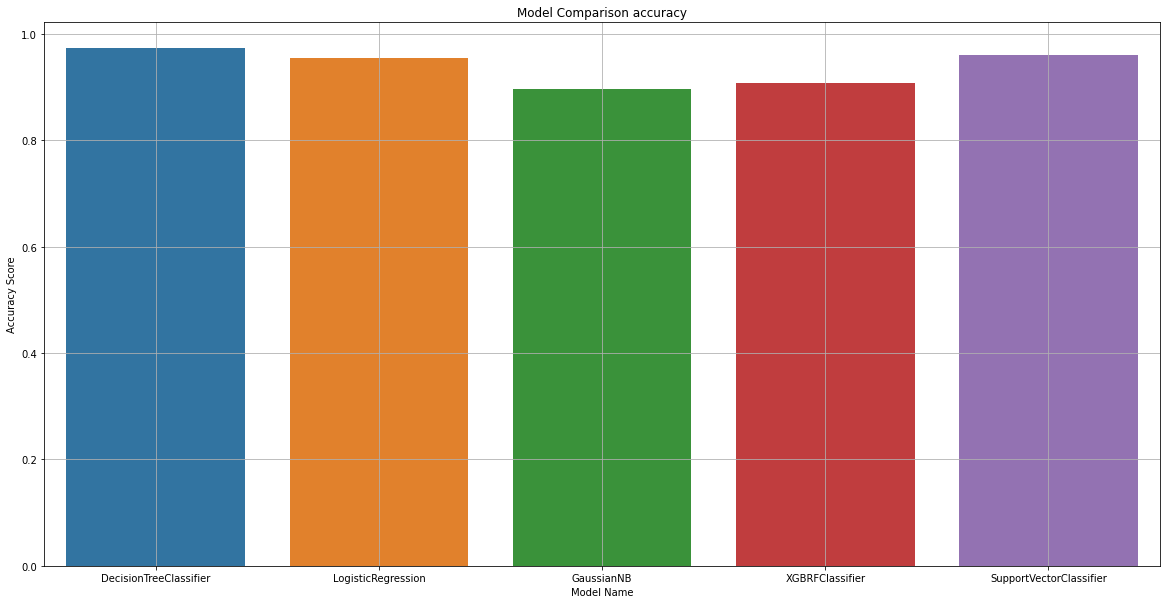

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Model Name", y = "Accuracy Score", data=df2)
plt.title("Model Comparison accuracy")
plt.grid()

**Le modèle le plus performant dans notre cas est "DecisionTreeClassifier"**